<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
Author: [Yury Kashnitskiy](https://yorko.github.io) (@yorko). Edited by Anna Tarelina (@feuerengel), and Mikhail Korshchikov (@MS4). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center>Assignment #3. Spring 2019
## <center> Part 1. Decision trees for classification and regression

**In this assignment, we will find out how a decision tree works in a regression task, then will build and tune classification decision trees for identifying heart diseases.**

Prior to working on the assignment, you'd better check out the corresponding course material:
 1. [Classification, Decision Trees and k Nearest Neighbors](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic03_decision_trees_kNN/topic3_decision_trees_kNN.ipynb?flush_cache=true), the same as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-3-decision-trees-and-knn) 
 2. Ensembles:
  - [Bagging](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part1_bagging.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-1-bagging)
  - [Random Forest](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part2_random_forest.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-2-random-forest)
  - [Feature Importance](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part3_feature_importance.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-3-feature-importance)
 3. - [Gradient boosting](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic10_boosting/topic10_gradient_boosting.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-10-gradient-boosting) 
   - Logistic regression, Random Forest, and LightGBM in the "Kaggle Forest Cover Type Prediction" competition: [Kernel](https://www.kaggle.com/kashnitsky/topic-10-practice-with-logit-rf-and-lightgbm) 
 4. You can also practice with demo assignments, which are simpler and already shared with solutions:
  - "Decision trees with a toy task and the UCI Adult dataset": [assignment](https://www.kaggle.com/kashnitsky/a3-demo-decision-trees) + [solution](https://www.kaggle.com/kashnitsky/a3-demo-decision-trees-solution)
  - "Logistic Regression and Random Forest in the credit scoring problem": [assignment](https://www.kaggle.com/kashnitsky/assignment-5-logit-and-rf-for-credit-scoring) + [solution](https://www.kaggle.com/kashnitsky/a5-demo-logit-and-rf-for-credit-scoring-sol)
 5. There are also 7 video lectures on trees, forests, boosting and their applications: [mlcourse.ai/video](https://mlcourse.ai/video) 

### Your task is to:
 1. write code and perform computations in the cells below
 2. choose answers in the [webform](https://docs.google.com/forms/d/1UupRN8TS7C9-lfD7OlgJzmD0ZfNe1dKUSLLaTnUokMw/edit). Solutions will be shared only with those who've filled in this form 
 
### <center> Deadline for A3: 2019 March 31, 20:59 GMT (London time)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

## 1. Decision trees for regression: a toy example

Let's consider the following one-dimensional regression problem. We need to build a function $\large a(x)$ to approximate the dependency $\large y = f(x)$ using the mean-squared error criterion: $\large \min \sum_i {(a(x_i) - f(x_i))}^2$.

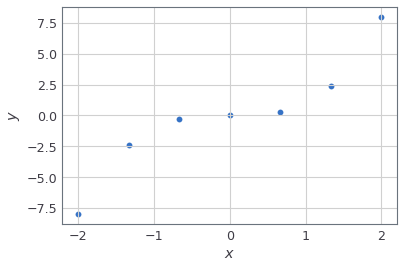

In [2]:
X = np.linspace(-2, 2, 7)
y = X ** 3 # original dependecy 

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

Let's make several steps to build a decision tree. In the case of a **regression** task, at prediction time, the leaf returns the average value for all observations in this leaf.

Let's start with a tree of depth 0, i.e. all observations placed in a single leaf. 

<br>You'll need to build a tree with only one node (also called **root**) that contains all train observations (instances). 
<br>How will predictions of this tree look like for $x \in [-2, 2]$? <br> Create an appropriate plot using a pen, paper and Python if needed (but no `sklearn` is needed yet).

In [3]:
X

array([-2.        , -1.33333333, -0.66666667,  0.        ,  0.66666667,
        1.33333333,  2.        ])

In [4]:
pred = X.mean()
print('{:.2f}'.format(pred))

-0.00


**Making first splits.**
<br>Let's split the data according to the following condition $[x < 0]$. It gives us the tree of depth 1 with two leaves. To clarify, for all instances with $x \geqslant 0$ the tree will return some value, for all instances with $x < 0$ it will return another value. Let's create a similar plot for predictions of this tree.

In [5]:
def split_to_nodes(data, t):
    '''Split init data for two nodes by a threshold t.
    '''
    l_node = [0]
    r_node = [1]

    for x in data:
        if x < t:
            l_node.append(x)
        elif x >= t:
            r_node.append(x)

    return l_node[1:], r_node[1:]

l_node, r_node = split_to_nodes(X, 0)

print('\nLeft node {}\nRight node {}'.format(l_node, r_node))
print('\nLeft node mean = {:.2f}\nRight node mean = {:.2f}'
      .format(np.mean(l_node), 
              np.mean(r_node)))


Left node [-2.0, -1.3333333333333335, -0.6666666666666667]
Right node [0.0, 0.6666666666666665, 1.333333333333333, 2.0]

Left node mean = -1.33
Right node mean = 1.00


In the decision tree algorithm, the feature and the threshold for splitting are chosen according to some criterion. The commonly used criterion for regression is based on variance: $$\large Q(X, y, j, t) = D(X, y) - \dfrac{|X_l|}{|X|} D(X_l, y_l) - \dfrac{|X_r|}{|X|} D(X_r, y_r),$$
where $\large X$ and $\large y$ are a feature matrix and a target vector (correspondingly) for training instances in a current node, $\large X_l, y_l$ and $\large X_r, y_r$ are splits of samples $\large X, y$ into two parts w.r.t. $\large [x_j < t]$ (by $\large j$-th feature and threshold $\large t$), $\large |X|$, $\large |X_l|$, $\large |X_r|$ (or, the same, $\large |y|$, $\large |y_l|$, $\large |y_r|$) are sizes of appropriate samples, and $\large D(X, y)$ is variance of answers $\large y$ for all instances in $\large X$:
$$\large D(X) = \dfrac{1}{|X|} \sum_{j=1}^{|X|}(y_j – \dfrac{1}{|X|}\sum_{i = 1}^{|X|}y_i)^2$$
Here $\large y_i = y(x_i)$ is the answer for the $\large x_i$ instance. Feature index $\large j$ and threshold $\large t$ are chosen to maximize the value of criterion  $\large Q(X, y, j, t)$ for each split.

In our 1D case,  there's only one feature so $\large Q$ depends only on threshold $\large t$ and training data $\large X$ and $\large y$. Let's designate it $\large Q_{1d}(X, y, t)$ meaning that the criterion no longer depends on feature index $\large j$, i.e. in 1D case $\large j = 0$.

In [6]:
def calc_var(X, y):
    '''Calculate variance.
    '''
    x_amount = len(X)
    y_mean = np.mean(y)

    sum_of_sq_errors = sum((np.array(y) - y_mean) ** 2)

    return sum_of_sq_errors / x_amount

def regression_var_criterion(X, y, t):
    '''Find out the criterion value for given threshold t.
    '''
    l_node, r_node = split_to_nodes(X, t)
    
    comm_var = calc_var(X, y)

    l_var, r_var = [calc_var(X, y) for X, y in 
                    ((l_node, np.array(l_node) ** 3), 
                     (r_node, np.array(r_node) ** 3))]

    Q_1d = comm_var-(len(l_node) / X.shape[0] * l_var)-(len(r_node) / X.shape[0] * r_var)
    
    return Q_1d

Create the plot of criterion $\large Q_{1d}(X, y, t)$  as a function of threshold value $t$ on the interval $\large [-1.9, 1.9]$.

In [7]:
interval = np.linspace(-1.9, 1.9, num=10)

q = interval.shape[0] * [0]

for idx, threshold in enumerate(interval):
    q[idx] = regression_var_criterion(X, y, threshold)

In [8]:
q

[10.666666666666664,
 10.666666666666664,
 10.754458161865568,
 9.481481481481481,
 9.481481481481481,
 9.481481481481477,
 9.481481481481477,
 10.754458161865566,
 10.666666666666666,
 10.666666666666666]

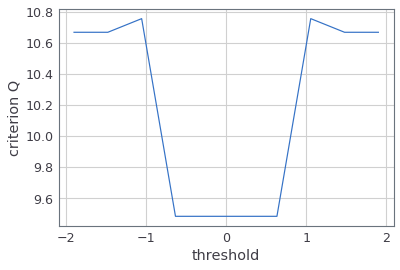

In [9]:
plt.plot(interval, q)
plt.xlabel('threshold')
plt.ylabel('criterion Q')
plt.show();

**<font color='red'>Question 1.</font> What is the worst threshold value (to perform a split) according to the variance criterion?**

<font color = 'red'> **Answer options:** </font>
- -1.9
- -1.3
- 0
- 1.3
- 1.9 

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai_news, pinned thread __#a3_q1-5__*

Then let's make splitting in each of the leaves nodes. 
<br> Take your tree with first threshold [$x<0$].
<br> Now add a split in the left branch (where previous split was $x < 0$) using the criterion $[x < -1.5]$, in the right branch (where previous split was $x \geqslant 0$) with the following criterion $[x < 1.5]$. 
<br>It gives us a tree of depth 2 with 7 nodes and 4 leaves. Create a plot of this tree predictions for $x \in [-2, 2]$.

In [10]:
l_node_1, r_node_1 = split_to_nodes(X, 0)
print('Left node {}\nRight node {}'
      .format(l_node_1, r_node_1))

Left node [-2.0, -1.3333333333333335, -0.6666666666666667]
Right node [0.0, 0.6666666666666665, 1.333333333333333, 2.0]


In [11]:
l_node_2, r_node_2 = split_to_nodes(l_node_1, -1.5)
print('Left node {}\nRight node {}'
      .format(l_node_2, r_node_2))

Left node [-2.0]
Right node [-1.3333333333333335, -0.6666666666666667]


In [12]:
l_node_3, r_node_3 = split_to_nodes(r_node_1, 1.5)
print('Left node {}\nRight node {}'
      .format(l_node_3, r_node_3))

Left node [0.0, 0.6666666666666665, 1.333333333333333]
Right node [2.0]


**<font color='red'>Question 2.</font> Tree predictions is a piecewise-constant function, right? How many "pieces" (horizontal segments in the plot that you've just built) are there in the interval [-2, 2]?**

<font color = 'red'> **Answer options:** </font>
- 2
- 4
- 6
- 8

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai_news, pinned thread __#a3_q1-5__*

## 2. Building a decision tree for predicting heart diseases
Let's read the data on heart diseases. The dataset can be downloaded from the course repo from [here](https://github.com/Yorko/mlcourse.ai/blob/master/data/mlbootcamp5_train.csv) by clicking on `Download` and then selecting `Save As` option. If you work with Git, then the dataset is already there in `data/mlbootcamp5_train.csv`.

**Problem**

Predict presence or absence of cardiovascular disease (CVD) using the patient examination results.

**Data description**

There are 3 types of input features:

- *Objective*: factual information;
- *Examination*: results of medical examination;
- *Subjective*: information given by the patient.

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

In [13]:
df = pd.read_csv('../../data/mlbootcamp5_train.csv', 
                 index_col='id', sep=';')

In [14]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Transform the features: 
- create "age in years" dividing age by 365.25 and taking floor ($\lfloor{x}\rfloor$ is the largest integer that is less than or equal to $x$) 
- create 3 binary features based on `cholesterol`.
- create 3 binary features based on `gluc`.
<br> Binary features equal to 1, 2 or 3. This method is called dummy-encoding or One Hot Encoding (OHE). It is more convenient to use `pandas.get_dummies`. There is no need to use the original features `cholesterol` and `gluc` after encoding.

In [15]:
df['age_years'] = df['age'] // 365.25

In [16]:
df[['chol_1', 'chol_2', 'chol_3']] = pd.get_dummies(df.cholesterol)
df.drop('cholesterol', axis=1, inplace=True)

In [17]:
df[['gluc_1', 'gluc_2', 'gluc_3']] = pd.get_dummies(df.gluc)
df.drop('gluc', axis=1, inplace=True)

In [18]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age_years,chol_1,chol_2,chol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,1,0,50.0,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,0,0,1,1,55.0,0,0,1,1,0,0
2,18857,1,165,64.0,130,70,0,0,0,1,51.0,0,0,1,1,0,0
3,17623,2,169,82.0,150,100,0,0,1,1,48.0,1,0,0,1,0,0
4,17474,1,156,56.0,100,60,0,0,0,0,47.0,1,0,0,1,0,0


Split data into train and holdout parts in the proportion of 7/3 using `sklearn.model_selection.train_test_split` with `random_state=17`.

In [19]:
y = df.cardio
X_train, X_valid, y_train, y_valid = train_test_split(df.drop('cardio', axis=1), y, 
                                                      test_size=.3,
                                                      random_state=17)

Train a decision tree on the dataset `(X_train, y_train)` with **max depth equal to 3** and `random_state=17`. Plot this tree with `sklearn.tree.export_graphviz` and Graphviz. Here we need to mention that `sklearn` doesn't draw decision trees on its own, but is able to output a tree in the `.dot` format that can be used by Graphviz for visualization. 

How to plot a decision tree, alternatives:
 1. Install Graphviz and pydotpus yourself (see below)
 2. Use our docker image with all needed packages already installed
 3. Easy way: execute `print(dot_data.getvalue())` with `dot_data` defined below (this can be done without pydotplus and Graphviz), go to http://www.webgraphviz.com, paste the graph code string (digraph Tree {...) and generate a nice picture

In [20]:
dt = DecisionTreeClassifier(max_depth=3, 
                            random_state=17)

In [21]:
model = dt.fit(X_train, y_train)

Take a look how trees are visualized in the [3rd part](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic03_decision_trees_kNN/topic3_decision_trees_kNN.ipynb?flush_cache=true) of course materials.

In [22]:
import pydotplus

In [23]:
def tree_to_png(tree, feature_names, png_file_to_save):
    '''Visualize tree and save it as png file.
    '''
    tree_str = export_graphviz(tree, 
                               feature_names=feature_names, 
                               filled=True, 
                               out_file=None)

    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)
    
    return 0

In [24]:
df.shape

(70000, 17)

In [25]:
tree_to_png(tree=model, feature_names=X_train.columns, 
            png_file_to_save='tree_1.png');

<img src='tree_1.png'></img>

**<font color='red'>Question 3.</font> Which 3 features are used to make predictions in the created decision tree?**

<font color = 'red'> **Answer options:** </font>
- age, ap_lo, chol=1
- age, ap_hi, chol=3
- smoke, age, gender
- alco, weight, gluc=3

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai_news, pinned thread __#a3_q1-5__*

Make predictions for holdout data `(X_valid, y_valid)` with the trained decision tree. Calculate accuracy.

In [26]:
pred_holdout = model.predict(X_valid)

In [29]:
accuracy_baseline_holdout = accuracy_score(y_valid, pred_holdout)
print('Accuracy on valid is equal {:.2f}'.format(accuracy_baseline_holdout))

Accuracy on valid is equal 0.72


Set up the depth of the tree using cross-validation on the dataset `(X_train, y_train)` in order to increase quality of the model. Use `GridSearchCV` with 5 folds. Fix `random_state=17` and change  `max_depth` from 2 to 10.

In [30]:
tree_params = {'max_depth': list(range(2, 11))}

tree_grid = GridSearchCV(estimator=dt, param_grid=tree_params, 
                         cv=5, n_jobs=-1, verbose=1, 
                         return_train_score=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    4.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

Draw the plot to show how mean accuracy is changing in regards to `max_depth` value on cross-validation.

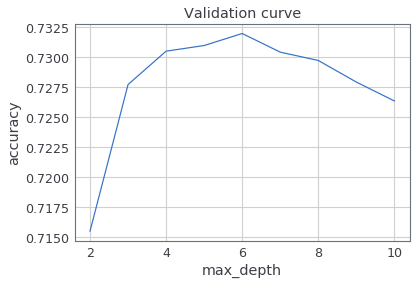

In [31]:
x_axis = list(range(2, 11))
y_axis = tree_grid.cv_results_['mean_test_score']

plt.plot(x_axis, y_axis)
plt.title('Validation curve')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show();

Print the best value of `max_depth` where the mean value of cross-validation quality metric reaches maximum. Also compute accuracy on holdout data. This can be done with the trained instance of the class `GridSearchCV`.

In [32]:
tree_grid.best_params_

{'max_depth': 6}

In [33]:
pred_grid = tree_grid.predict(X_valid)
accuracy_grid_holdout = accuracy_score(y_valid, 
                                       pred_grid)

print('GridSearchCV accuracy equals {:.2f}'
      .format(accuracy_grid_holdout))

GridSearchCV accuracy equals 0.73


Сalculate the effect of `GridSearchCV`: check out the expression (acc2 - acc1) / acc1 * 100%, where acc1 and acc2 are accuracies on holdout data before and after tuning max_depth with GridSearchCV respectively.

In [34]:
effect_of_gridsearchcv = \
    (accuracy_grid_holdout - accuracy_baseline_holdout) \
    / accuracy_baseline_holdout * 100

print('Effect of GridSearchCV equals {}'
      .format(effect_of_gridsearchcv))

Effect of GridSearchCV equals 0.6271869016967002


**<font color='red'>Question 4.</font> Choose all correct statements.**

<font color = 'red'> **Answer options:** </font>

- There exists a local maximum of accuracy on the built validation curve
- `GridSearchCV` increased holdout accuracy by **more** than 1%
- There is **no** local maximum of accuracy on the built validation curve
- `GridSearchCV` increased holdout accuracy by **less** than 1%

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai_news, pinned thread __#a3_q1-5__*

Take a look at the SCORE table to estimate ten-year risk of fatal cardiovascular disease in Europe. [Source paper](https://academic.oup.com/eurheartj/article/24/11/987/427645).

<img src='../../img/SCORE2007-eng.png' width=70%>

Let's create new features according to this picture:
- $age \in [40,50), age \in [50,55), age \in [55,60), age \in [60,65) $ (4 features)
- systolic blood pressure: $ap\_hi \in [120,140), ap\_hi \in [140,160), ap\_hi \in [160,180),$ (3 features)

If the values of age or blood pressure don't fall into any of the intervals then all binary features will be equal to zero. 

In [62]:
df['age_40-50'] = [1 if (40 <= val) and (val < 50) else 0 for val in df.age_years]
df['age_50-55'] = [1 if (50 <= val) and (val < 55) else 0 for val in df.age_years]
df['age_55-60'] = [1 if (55 <= val) and (val < 60) else 0 for val in df.age_years]
df['age_60-65'] = [1 if (60 <= val) and (val < 65) else 0 for val in df.age_years]

df['ap_hi_120-140'] = [1 if (120 <= val) and (val < 140) else 0 for val in df.ap_hi]
df['ap_hi_140-160'] = [1 if (140 <= val) and (val < 160) else 0 for val in df.ap_hi]
df['ap_hi_160-180'] = [1 if (160 <= val) and (val < 180) else 0 for val in df.ap_hi]

In [63]:
for feature in ('age_40-50', 'age_50-55', 'age_55-60', 'age_60-65'):
    print('\n{}'.format(df[feature].value_counts()))


0    50227
1    19773
Name: age_40-50, dtype: int64

0    52910
1    17090
Name: age_50-55, dtype: int64

0    51527
1    18473
Name: age_55-60, dtype: int64

0    57220
1    12780
Name: age_60-65, dtype: int64


In [65]:
for feature in ('ap_hi_120-140', 'ap_hi_140-160', 'ap_hi_160-180'):
    print('\n{}'.format(df[feature].value_counts()))


1    37561
0    32439
Name: ap_hi_120-140, dtype: int64

0    55564
1    14436
Name: ap_hi_140-160, dtype: int64

0    66099
1     3901
Name: ap_hi_160-180, dtype: int64


<br>Add a ``smoke`` feature.
<br>Build the ``cholesterol``  and ``gender`` features. Transform the ``cholesterol`` to 3 binary features according to it's 3 unique values ( ``cholesterol``=1,  ``cholesterol``=2 and  ``cholesterol``=3). Transform the ``gender`` from 1 and 2 into 0 and 1. It is better to rename it to ``male`` (0 – woman, 1 – man). In general, this is typically done with ``sklearn.preprocessing.LabelEncoder`` but here in case of only 2 unique values it's not necessary.

Finally, the decision tree is built using these 12 binary features (excluding all original features that we had before this feature engineering part).

Create a decision tree with the limitation `max_depth=3` and train it on the whole train data. Use the `DecisionTreeClassifier` class with fixed `random_state=17`, but all other arguments (except for `max_depth` and `random_state`) should be left with their default values.

In [67]:
df.smoke.value_counts()

0    63831
1     6169
Name: smoke, dtype: int64

In [74]:
df.gender, _ = pd.factorize(df.gender.values)
df.rename(columns={'gender': 'male'}, inplace=True)
df.male.value_counts()

1    45530
0    24470
Name: male, dtype: int64

In [81]:
df_new_features = df[['male', 'smoke', 'chol_1', 'chol_2', 'chol_3',
                      'age_40-50', 'age_50-55', 'age_55-60', 'age_60-65', 
                      'ap_hi_120-140', 'ap_hi_140-160', 'ap_hi_160-180']]

In [83]:
df_new_features.columns.shape

(12,)

In [85]:
df_new_features.shape, y.shape

((70000, 12), (70000,))

In [86]:
tree = DecisionTreeClassifier(max_depth=3, 
                              random_state=17)
tree.fit(df_new_features, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

**<font color='red'>Question 5.</font> Which binary feature is the most important for heart disease detection (i.e., it is placed in the root of the tree)?**

<font color = 'red'> **Answer options:** </font>

- Systolic blood pressure from 160 to 180 (mmHg)
- Cholesterol level == 3
- Systolic blood pressure from 140 to 160 (mmHg)
- Age from 50 to 55 (years)
- Smokes / doesn't smoke
- Age from 60 to 65 (years)

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai_news, pinned thread __#a3_q1-5__*

In [88]:
tree_to_png(tree=tree, 
            feature_names=df_new_features.columns, 
            png_file_to_save='tree_2.png');

<img src='tree_2.png'></img>

In [93]:
for feature, weight in zip(df_new_features.columns, tree.feature_importances_):
    print('\nFeature "{}" has importance weight equals {:.5f}"'
          .format(feature, weight))


Feature "male" has importance weight equals 0.00000"

Feature "smoke" has importance weight equals 0.00005"

Feature "chol_1" has importance weight equals 0.00046"

Feature "chol_2" has importance weight equals 0.00000"

Feature "chol_3" has importance weight equals 0.16983"

Feature "age_40-50" has importance weight equals 0.00000"

Feature "age_50-55" has importance weight equals 0.00027"

Feature "age_55-60" has importance weight equals 0.00050"

Feature "age_60-65" has importance weight equals 0.00000"

Feature "ap_hi_120-140" has importance weight equals 0.00000"

Feature "ap_hi_140-160" has importance weight equals 0.58039"

Feature "ap_hi_160-180" has importance weight equals 0.24850"
